In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

- 이미지 배치 -> subplot 사용하자!
- subplot(행수,열수,인덱스)
- 인덱스는 1부터 시작해야한다.
- axios('off') -> 가로, 세로 수,텍스트 제거

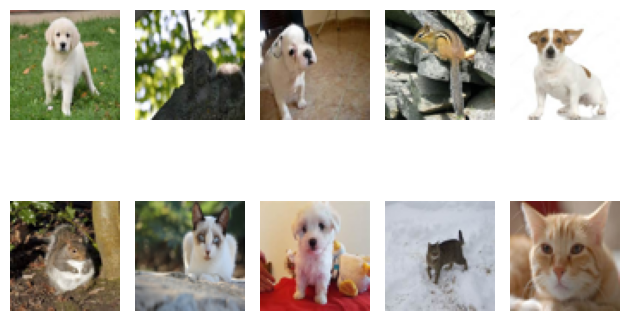

In [ ]:
data = pickle.load(open("mid_animal_data_pub.pkl","rb"))

for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(data['test1_images'][i-1])
  plt.axis('off')
plt.tight_layout()
plt.savefig('image1.png')
plt.show()

- 코사인 유사도 계산하기
- numpy를 사용하여 cosine 공식 적용
- dot으로 내적, norm으로 크기 구하기

In [ ]:
from numpy import dot
from numpy.linalg import norm

x = data['train_vectors'][0]
y = data['test1_vectors'][1]

cos_sim = dot(x,y) / (norm(x)*norm(y))
print(cos_sim)

-0.23914206


In [ ]:
index = []
for i in range(10):
  cos_similarity = []
  for j in range(len(data['train_vectors'])):
    cos = np.dot(data['test1_vectors'][i],data['train_vectors'][j]) / (norm(data['test1_vectors'][i]) * norm(data['train_vectors'][j]))
    cos_similarity.append(cos)
  l = cos_similarity.copy()
  l.sort(reverse=True)

  for a in range(3):
    index.append(cos_similarity.index(l[a])) # 리스트.index(값) -> 리스트에서 해당 값에 대한 인덱스 반환
print(sum(index))

14090
[346, 442, 158, 463, 97, 70, 240, 699, 480, 571, 977, 338, 593, 282, 584, 498, 835, 37, 736, 324, 918, 127, 382, 959, 7, 991, 141, 447, 847, 501]
30


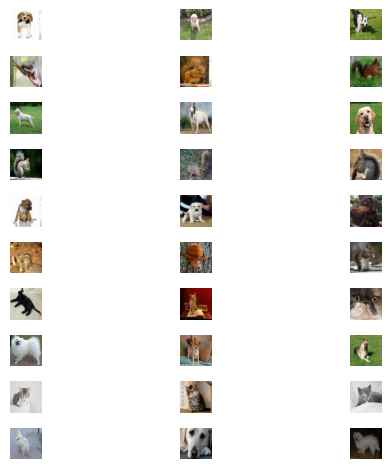

In [ ]:
for i in range(1,31):
  plt.subplot(10,3,i)
  plt.imshow(data['train_images'][index[i-1]])
  plt.axis('off')
plt.tight_layout()
plt.savefig('image2.png')
plt.show()

# f, ax = plt.subplots(2, 5)
# plt.subplots_adjust(wspace=0.1, hspace=-0.2)

# for i in range(2):
#   for j in range(5):
#     ax[i,j].imshow(data['test1_images'][i*5+j])
#     ax[i,j].axis('off')

# plt.show()

- nn.Linear(x,y)의 인자 -> x:입력 수(행) y:결과값 종류

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x_train = torch.from_numpy(data["train_vectors"])
y_train = torch.from_numpy(data["train_labels"])

model = nn.Linear(256,3)
optim = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(10001):
  z = model(x_train)
  cost = F.cross_entropy(z, y_train)

  optim.zero_grad()
  cost.backward()
  optim.step()

  with torch.no_grad():
    if epoch % 100 == 0:
      print(f"epoch: {epoch}, cost: {cost.item()}")

epoch: 0, cost: 3.065326452255249
epoch: 100, cost: 0.00017694933922030032
epoch: 200, cost: 8.847065328154713e-05
epoch: 300, cost: 6.48401546641253e-05
epoch: 400, cost: 5.457468068925664e-05
epoch: 500, cost: 4.891144999419339e-05
epoch: 600, cost: 4.531125887297094e-05
epoch: 700, cost: 4.278605047147721e-05
epoch: 800, cost: 4.08765408792533e-05
epoch: 900, cost: 3.9342343370663e-05
epoch: 1000, cost: 3.8048889109632e-05
epoch: 1100, cost: 3.6914505471941084e-05
epoch: 1200, cost: 3.588856270653196e-05
epoch: 1300, cost: 3.493838448775932e-05
epoch: 1400, cost: 3.404217568458989e-05
epoch: 1500, cost: 3.31849732901901e-05
epoch: 1600, cost: 3.235559051972814e-05
epoch: 1700, cost: 3.154782098135911e-05
epoch: 1800, cost: 3.075677523156628e-05
epoch: 1900, cost: 2.997825140482746e-05
epoch: 2000, cost: 2.921091072494164e-05
epoch: 2100, cost: 2.84525867755292e-05
epoch: 2200, cost: 2.7703019441105425e-05
epoch: 2300, cost: 2.6962179617839865e-05
epoch: 2400, cost: 2.622861393319908

- argmax()를 사용하려면 tensor를 쓰자.
- dim=1 인자를 넣어야 가로를 기준으로 결과 만들어준다.

In [ ]:
# 위에 자료 이용한 방법
h = model(torch.tensor(data["test2_vectors"]))
print(torch.argmax(h,dim=1))

# 스킷런으로 새로 학습 시킨 방법
import numpy as np
from sklearn.linear_model import LogisticRegression

x_train = torch.from_numpy(data["train_vectors"])
y_train = torch.from_numpy(data["train_labels"])

logistic = LogisticRegression()
logistic.fit(x_train, y_train)

pred = logistic.predict(torch.from_numpy(data["test2_vectors"]))
print(pred)

tensor([2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0,
        1, 1, 1, 1, 2, 2])
[2 1 2 2 2 0 0 0 1 1 2 2 1 1 2 1 0 0 2 0 2 1 2 0 1 1 1 1 2 2]
